## Problem Statement: Customer Segmentation Using Clustering for Credit Card Data

### Objective
To develop a clustering model for customer segmentation based on the provided credit card usage data from a bank, encompassing the last six months. The goal is to identify distinct customer groups to enable targeted marketing strategies and personalized services.

### Background
In the highly competitive banking sector, understanding customer behavior is crucial for improving customer satisfaction and loyalty. By segmenting customers based on their credit card usage patterns, the bank can tailor its products, services, and marketing efforts to better meet the needs of different customer groups.

### Data Description
The dataset consists of credit card usage information for the past six months. It includes various attributes related to customers' spending behavior, payment patterns, and other relevant metrics. 

### Requirements
1. **Data Preprocessing**: 
    - Handle missing values.
    - Normalize or standardize the data.
    - Encode categorical variables if any.

2. **Feature Engineering**: 
    - Identify and select relevant features for clustering.
    - Perform dimensionality reduction if necessary.

3. **Clustering Algorithm**: 
    - Choose appropriate clustering algorithms (e.g., K-Means, Hierarchical Clustering, DBSCAN).
    - Determine the optimal number of clusters using methods such as the Elbow Method, Silhouette Score, or other suitable techniques.

4. **Model Evaluation**: 
    - Evaluate the clustering results using metrics like silhouette score, Davies-Bouldin index, etc.
    - Interpret the clusters and validate them against business knowledge and objectives.

5. **Actionable Insights**: 
    - Provide a detailed analysis of each customer segment.
    - Recommend specific strategies for each segment to enhance customer engagement and satisfaction.

### Expected Deliverables
1. **Clustering Model**: A well-documented clustering model with code implementation.
2. **Segmentation Report**: A comprehensive report detailing the characteristics of each customer segment.
3. **Actionable Insights**: Recommendations for marketing and service strategies tailored to each customer segment.
4. **Visualization**: Visual representations of the clusters and key findings for easy interpretation by stakeholders.

## A.IMPORT LIBRARY

In [1]:
# libraries
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline



# elbow & silhouette for PCA
from yellowbrick.cluster import KElbowVisualizer

# Model Saving
import pickle
import json


import warnings
warnings.filterwarnings("ignore")



## B. Data Loading

The first step is to load the dataset. Since my dataset is in CSV format, I will use the `read_csv` function.

In [2]:
# data loading
data = pd.read_csv('Dataset.csv')
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.000000,NaN,0.000000,8
1,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
2,2322,1.979916,0.125000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.000000,NaN,0.000000,8
3,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
4,3976,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


I will use the `.columns` function to check the columns in the dataset. The reason for using this function is to identify all the columns present in the dataset, allowing me to determine which columns to prioritize for analysis and clustering.

In [3]:
#Check kolom 
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

I will use the `.describe` function to get a summary of the dataset. The reason for using this function is to check the statistical summary of the dataset, which includes count, mean, standard deviation, minimum, and maximum values, as well as the 25th, 50th, and 75th percentiles for each numerical column.

In [4]:
data.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4474.000000,4475.000000,4317.000000,4475.000000,4475.000000
mean,4476.000000,1565.743939,0.877608,1003.158324,588.504849,415.025075,973.453671,0.490122,0.202614,0.364989,0.134156,3.196425,14.490503,4494.020175,1726.212274,854.429538,0.157206,11.516425
std,2583.931114,2091.205727,0.235604,2210.812899,1666.500287,927.360842,2133.464502,0.399874,0.298502,0.397336,0.199221,6.500169,24.156038,3668.535689,2961.258570,2306.411178,0.295869,1.347819
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000
25%,2239.000000,132.536353,0.888889,40.065000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,390.206371,169.814310,0.000000,12.000000
50%,4476.000000,874.905296,1.000000,362.480000,29.990000,89.450000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,831.048408,309.854995,0.000000,12.000000
75%,6713.000000,2058.519163,1.000000,1122.640000,580.320000,484.255000,1098.569962,0.916667,0.333333,0.750000,0.181818,4.000000,17.000000,6000.000000,1895.959003,830.395060,0.166667,12.000000
max,8950.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,29282.109150,1.000000,1.000000,1.000000,1.166667,110.000000,358.000000,30000.000000,46930.598240,61031.618600,1.000000,12.000000


I will use the `.info` function to get information about the dataset. The reason for using this function is to check what information can be obtained from the dataset, such as the total number of entries, data types of each column, and whether the data types are appropriate. If any data type is not suitable, I will change it to a more appropriate data type.

In [5]:
# Check info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

#### Displaying the First and Last 10 Records

Based on the data info above, the insights I have gathered are:

RangeIndex: 4475

Columns: 18

The data types are appropriate for their respective columns. Next, I will display the first 10 records and the last 10 records using the `.head` function to display the first records and the .tail function to display the last records.

In [6]:
# Show data head
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875000,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125000,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
5,4266,2237.238086,1.000000,120.0,120.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2500.0,343.102984,712.986387,0.0,8
6,4360,2730.843802,1.000000,2900.0,2900.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2900.0,0.000000,NaN,0.0,8
7,4680,424.994385,0.375000,1200.0,1200.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1200.0,57.266292,56.720210,0.0,8
8,5884,18.885677,0.375000,57.0,57.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
9,24,0.004816,0.545455,51.7,0.0,51.7,0.0,0.250,0.000,0.250,0.0,0,3,3000.0,33.249088,0.059481,0.0,12


In [7]:
# Show data tail/last
data.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,1588,538.768762,0.909091,226.95,129.58,97.37,452.009130,0.545455,0.090909,0.454545,0.272727,8,9,1200.0,946.649324,211.220001,0.000000,11
4466,6900,7468.012010,1.000000,1569.41,796.07,773.34,4500.288676,0.545455,0.454545,0.363636,0.272727,7,10,8700.0,2162.943350,4628.802111,0.000000,11
4467,2528,427.642111,0.888889,0.00,0.00,0.00,2563.705644,0.000000,0.000000,0.000000,0.888889,62,0,1200.0,2853.967334,146.976542,0.500000,9
4468,1226,706.327578,0.888889,169.54,169.54,0.00,1406.735573,0.333333,0.333333,0.000000,0.888889,14,3,2500.0,302.976780,142.597254,0.000000,9
4469,2152,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


The next step is to check for duplicate data using the `.duplicated` function. If there are any duplicate entries in the dataset, I will drop them using the drop_duplicates function.

In [8]:
# Check Duplicated Data
data.duplicated().sum()

0

The dataset has no duplicate entries. Next, I will check for missing values using the `.isnull().sum()` function. If there are any missing values in the dataset, I will handle them by using the dropna function to remove rows with missing values, ensuring there are no unwanted anomalies.

In [9]:
# Check missing value
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Since there are 158 missing values in the dataset, I will handle them by using the dropna function to remove rows with missing values

In [10]:
# drop missing value
data.dropna(inplace=True)
data.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

After handling the missing values and confirming that there are no more missing values in the dataset, the next step is to proceed with further data analysis or processing according to the project's objectives, such as customer segmentation using clustering techniques or any other analysis as needed for your project.

## C.EXPLORATORY DATA ANALYSIS (EDA)

In the EDA section, I will conduct a comprehensive analysis of the data I have. For example, I will visualize the data and provide insights. The first thing I will do is display the columns that I will use for visualization.

In [11]:
# Check columns data
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

#### I.Balance over Purchase

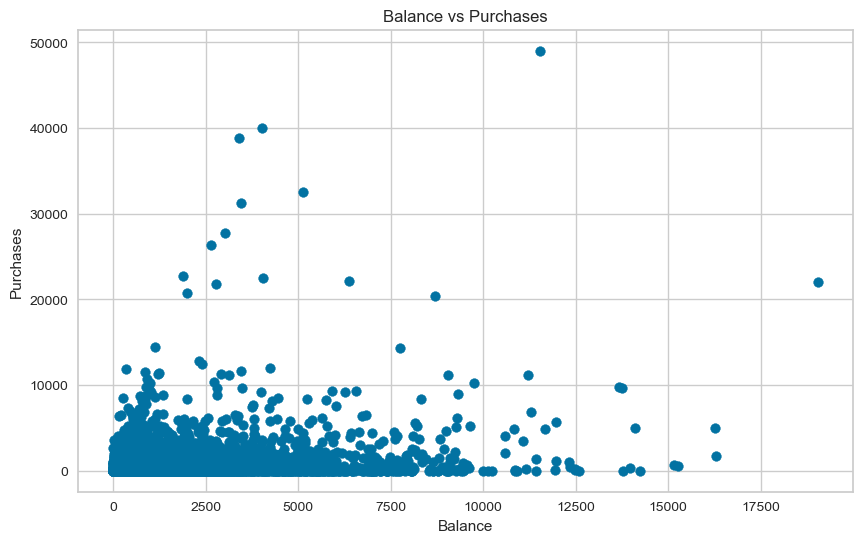

In [12]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['BALANCE'], data['PURCHASES'])
plt.title('Balance vs Purchases')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.grid(True)
plt.show()


From the scatter plot analysis, it is evident that accounts with a `BALANCE` in the range of `0 - 5000` tend to have higher purchase frequencies, with average purchases predominantly below `10000`. Conversely, accounts with a `BALANCE` in the `5000-17500/above` range show fewer purchases. Therefore, it can be concluded that accounts with a `BALANCE` below `5000` tend to engage in more frequent purchasing activities.


#### II.Balance over Purchase Frequency

The first thing I will do is create conditions to categorize how frequently accounts make purchases. Then, I will incorporate these conditions into my visualization.

In [13]:
# Category Function
def kategori(frequency):
    if frequency >= 1:
        return 'Frequently Purchase'
    else:
        return 'Not Frequently Purchase'

data['PURCHASES_FREQUENCY_CATEGORY'] = data['PURCHASES_FREQUENCY'].apply(kategori)

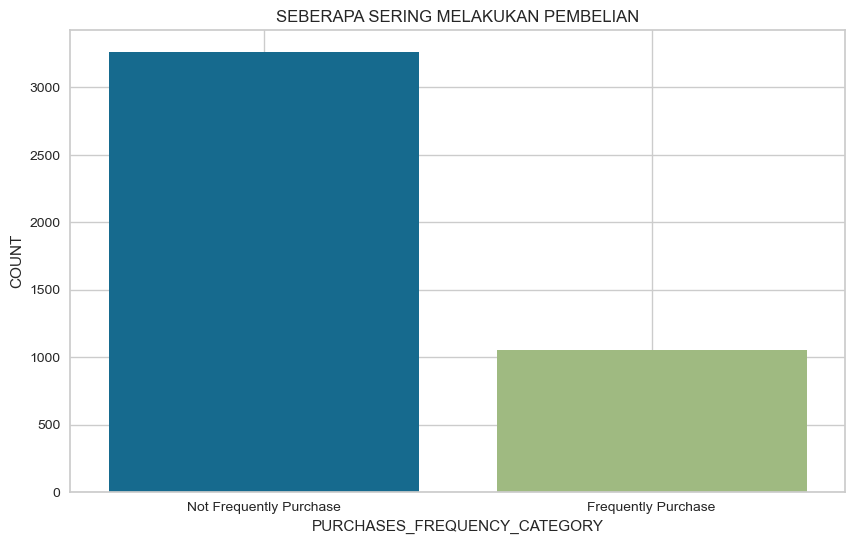

In [14]:
# Function count
frequency_count = data['PURCHASES_FREQUENCY_CATEGORY'].value_counts()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=frequency_count.index, y=frequency_count.values)
plt.title('SEBERAPA SERING MELAKUKAN PEMBELIAN')
plt.xlabel('PURCHASES_FREQUENCY_CATEGORY')
plt.ylabel('COUNT')
plt.grid(True)
plt.show()

From the bar plot above, it can be observed that on average, there are more accounts categorized as `Not Frequently Purchase`, totaling more than `3000`. Conversely, accounts categorized as `Frequently Purchase` are fewer, not even reaching half of the count of `Not Frequently Purchase`.

### III. Analyzing Balance Update Frequency

First, I will create conditions to categorize whether `BALANCE` is frequently updated (`1 = frequently update`) or not (`0 = not frequently update`).

In [15]:
# Function Category
def kategori(frequency):
    if frequency >= 1:
        return 'Frequently Update'
    else:
        return 'Not Frequently Update'

data['BALANCE_CATEGORY'] = data['BALANCE_FREQUENCY'].apply(kategori)

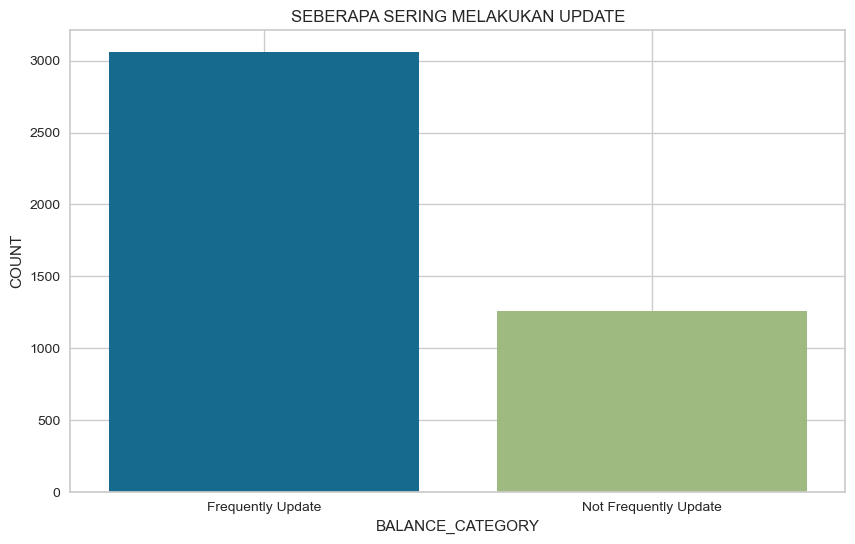

In [16]:
update = data['BALANCE_CATEGORY'].value_counts()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=update.index, y=update.values)
plt.title('SEBERAPA SERING MELAKUKAN UPDATE')
plt.xlabel('BALANCE_CATEGORY')
plt.ylabel('COUNT')
plt.grid(True)
plt.show()

From the bar plot above, it is evident that accounts with frequent `BALANCE` updates are more prevalent. Conversely, accounts categorized as `Not frequently Update` are fewer, numbering below `1500`.

#### IV. Analyzing Installment Purchases Frequency

First, I will create conditions to categorize whether purchases are done frequently in installments (`1 = frequently done`) or not (`0 = not frequently done`).

In [17]:
# membuat fungsi kategori
def kategori(frequency):
    if frequency >= 1:
        return 'Frequently Done'
    else:
        return 'Not Frequently Done'

data['KATEGORI'] = data['PURCHASES_INSTALLMENTS_FREQUENCY'].apply(kategori)

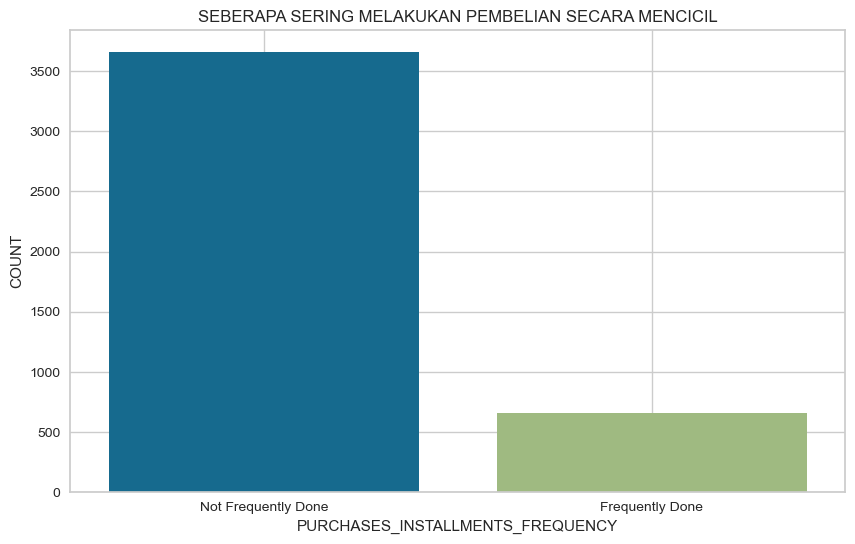

In [18]:
mencicil = data['KATEGORI'].value_counts()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=mencicil.index, y=mencicil.values)
plt.title('SEBERAPA SERING MELAKUKAN PEMBELIAN SECARA MENCICIL')
plt.xlabel('PURCHASES_INSTALLMENTS_FREQUENCY')
plt.ylabel('COUNT')
plt.grid(True)
plt.show()

From the data above, it can be concluded that there are more accounts that do not make purchases in installments.

#### V. Analyzing Lump-Sum Purchases

To analyze whether purchases are made in lump-sum or not, I will proceed with categorizing the data accordingly.

In [19]:
# membuat fungsi kategori
def kategori(frequency):
    if frequency >= 1:
        return 'Frequently Purchase'
    else:
        return 'Not Frequently Purchase'

data['Kategori'] = data['ONEOFF_PURCHASES_FREQUENCY'].apply(kategori)

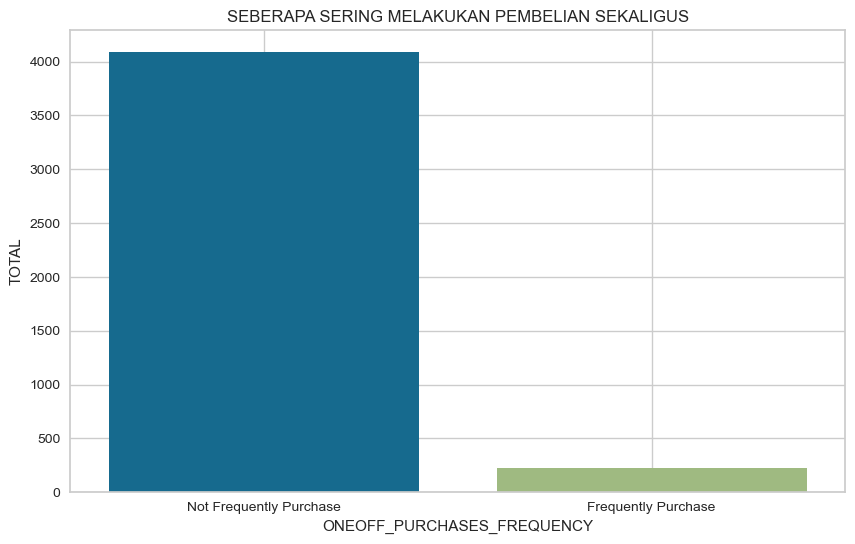

In [20]:
ONEGO = data['Kategori'].value_counts()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=ONEGO.index, y=ONEGO.values)
plt.title('SEBERAPA SERING MELAKUKAN PEMBELIAN SEKALIGUS')
plt.xlabel('ONEOFF_PURCHASES_FREQUENCY')
plt.ylabel('TOTAL')
plt.grid(True)
plt.show()

From the data above, it can be concluded that there are more accounts categorized as `not frequently done`, indicating that they do not make purchases in `ONE-GO/Lump-Sum`.

## D.FEATURE ENGINEERING

In this section, data preparation for model training such as data cleaning and data transformation will be conducted.

### Data Inference Extraction

In [21]:
# Mengambil 1 data secara acak dari dataset yang akan dijadikan sebagai data inference ke dalam variabel data_inf
data_inf = data.sample(1, random_state=6)
# Menghapus data inference dari dataset
data.drop(data_inf.index, inplace=True)
# Melakukan reset index untuk data_inf dan dataset
data.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# Menyimpan data inference ke bentuk csv
data_inf.to_csv('data_inference.csv',index=False)

In [22]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'PURCHASES_FREQUENCY_CATEGORY', 'BALANCE_CATEGORY', 'KATEGORI',
       'Kategori'],
      dtype='object')

In [23]:
# Daftar kolom yang ingin dihapus
kolom = ['PURCHASES_FREQUENCY_CATEGORY', 'BALANCE_CATEGORY', 'KATEGORI', 'Kategori']

# Buat dataframe baru tanpa kolom yang ingin dihapus
data.drop(columns=kolom, inplace=True)
# Membuat dataframe baru yang berisi setiap kolom kecuali kolom CUST_ID
df = data.drop('CUST_ID', axis=1)
df.head()
# Tampilkan lima baris pertama dari dataframe baru

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,943.584041,0.875,103.0,103.0,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
1,461.455720,1.000,585.0,585.0,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
2,1053.594730,1.000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
3,2237.238086,1.000,120.0,120.0,0.0,0.0,0.125,0.125,0.0,0.0,0,1,2500.0,343.102984,712.986387,0.0,8
4,424.994385,0.375,1200.0,1200.0,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,57.266292,56.720210,0.0,8


#### Outliers Handling

In this section, we will handle outliers in each column. Before doing so, I will create a new dataframe containing each column.

In [24]:
# Check skew data
df.skew()

BALANCE                              2.441745
BALANCE_FREQUENCY                   -2.082791
PURCHASES                            8.901306
ONEOFF_PURCHASES                    10.044418
INSTALLMENTS_PURCHASES               8.029409
CASH_ADVANCE                         4.712676
PURCHASES_FREQUENCY                  0.036069
ONEOFF_PURCHASES_FREQUENCY           1.495572
PURCHASES_INSTALLMENTS_FREQUENCY     0.487126
CASH_ADVANCE_FREQUENCY               1.788515
CASH_ADVANCE_TRX                     4.722416
PURCHASES_TRX                        4.430992
CREDIT_LIMIT                         1.525550
PAYMENTS                             5.986724
MINIMUM_PAYMENTS                    12.355565
PRC_FULL_PAYMENT                     1.854035
TENURE                              -2.996526
dtype: float64

Based on the data above, it can be seen that there are some columns with skewed distributions and some with normal distributions. Therefore, I will handle the skewed data using a `Winsorizer`.

In [25]:
# Membuat list skewed dan normal untuk menampung nama kolom
skewed = []
normal = []
# Menampilkan nilai skew setiap kolom menggunakan looping
for i in df.columns.to_list():
    # memasukkan kolom ke dalam list berdasarkan nilai skewness
    if data[i].nunique()>10:
        if data[i].skew() > -0.5 and data[i].skew() < 0.5:
            normal.append(i)
        else:
            skewed.append(i)

# Menampilkan kolom berdasarkan distribusinya
print('skew: ', skewed)
print('not skew: ', normal)

skew:  ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
not skew:  ['PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY']


Then, I will handle outliers using the capping method. I choose capping because it allows me to maintain the original distribution after applying the `Winsorizer`.

In [26]:
# Capping the skewed distribution
winsoriser_skewed = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=1.5,
                             variables=skewed)


In [27]:
df_capped = winsoriser_skewed.fit_transform(df)
df_capped.skew()

BALANCE                             1.170360
BALANCE_FREQUENCY                  -1.175527
PURCHASES                           1.200173
ONEOFF_PURCHASES                    1.231207
INSTALLMENTS_PURCHASES              1.224718
CASH_ADVANCE                        1.259970
PURCHASES_FREQUENCY                 0.036069
ONEOFF_PURCHASES_FREQUENCY          1.314165
PURCHASES_INSTALLMENTS_FREQUENCY    0.487126
CASH_ADVANCE_FREQUENCY              1.383523
CASH_ADVANCE_TRX                    1.262521
PURCHASES_TRX                       1.117011
CREDIT_LIMIT                        1.102217
PAYMENTS                            1.144673
MINIMUM_PAYMENTS                    1.193451
PRC_FULL_PAYMENT                    1.216776
TENURE                             -2.996526
dtype: float64

After capping, I will examine the difference in data distribution before and after applying the capping.

Kolom inflation sebelum dilakukan capping


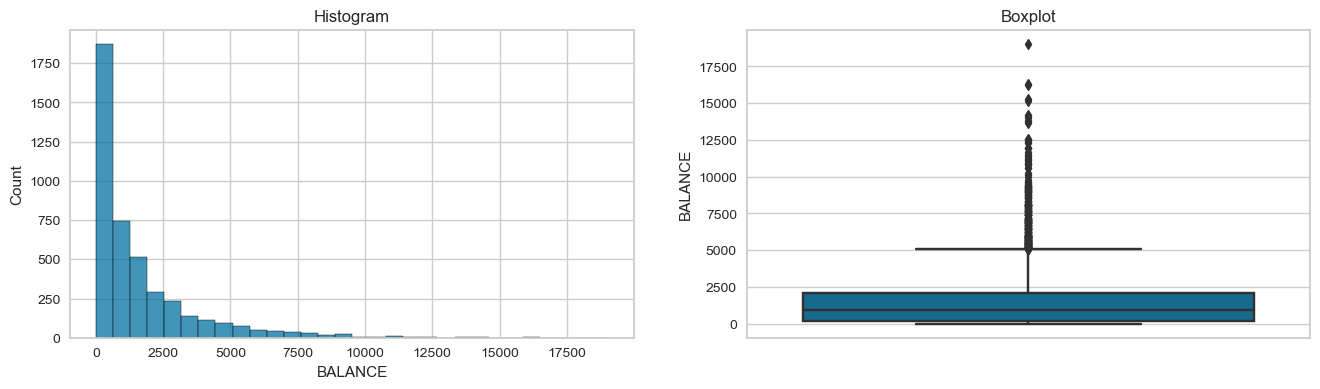


 Kolom inflation setelah dilakukan Capping


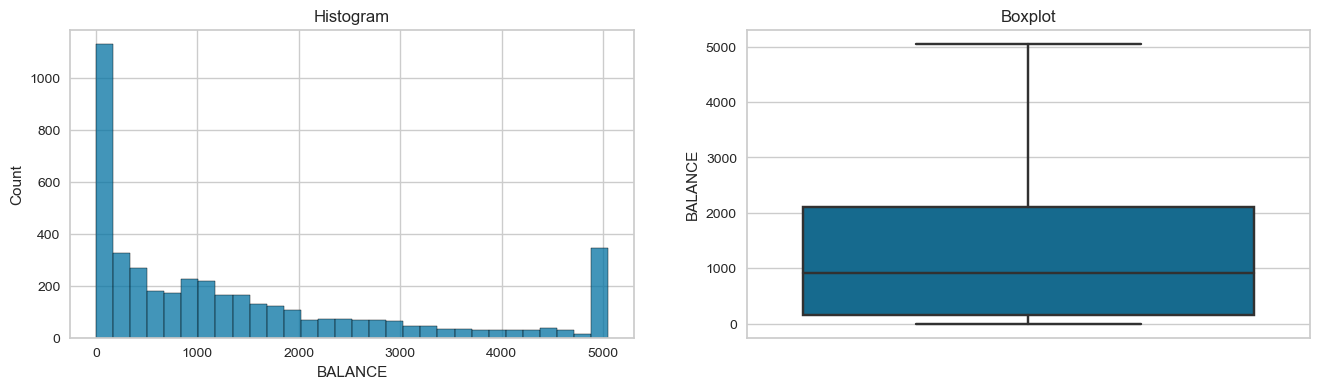

In [28]:
# Membuat fungsi untuk menampilkan histogram dan boxplot dari kolom 
def outliers_plots(data, variabel):    
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[variabel], bins=30)
    plt.title('Histogram')
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variabel])
    plt.title('Boxplot')
    plt.show()

# Melihat histogram dan boxplot kolom inflation
print('Kolom inflation sebelum dilakukan capping')
outliers_plots(df, 'BALANCE')
print('\n Kolom inflation setelah dilakukan Capping')
outliers_plots(df_capped, 'BALANCE')

Next, I will use scaling with the `Standard Scaler` method. The reason for choosing `Standard Scaler` is because it is not sensitive to outliers. `Standard Scaler` uses the mean and standard deviation for scaling.

In [29]:
# scaler data
scaler = StandardScaler()

In [30]:
# Standard scaling pada fitur-fitur dalam DataFrame
scaled_data = scaler.fit_transform(df_capped)
scaled_data = pd.DataFrame(scaled_data, columns=df.columns)
scaled_data


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.310376,-0.769216,-0.731006,-0.498973,-0.746457,-0.669475,-0.927578,-0.256010,-0.928555,-0.717634,-0.701251,-0.827358,-1.006190,-0.918135,-0.291624,-0.637789,-2.666094
1,-0.621078,0.607496,-0.195481,0.413393,-0.746457,-0.669475,-0.927578,-0.256010,-0.928555,-0.717634,-0.701251,-0.827358,-1.006190,-0.884696,-0.758077,-0.637789,-2.666094
2,-0.239481,0.607496,0.765575,2.050730,-0.746457,-0.669475,-0.927578,-0.256010,-0.928555,-0.717634,-0.701251,-0.827358,-0.860195,-0.775816,-0.622088,-0.637789,-2.666094
3,0.523304,0.607496,-0.712118,-0.466794,-0.746457,-0.669475,-0.927578,-0.256010,-0.928555,-0.717634,-0.701251,-0.827358,-0.568204,-0.818088,0.253619,-0.637789,-2.666094
4,-0.644576,-1.895614,0.487814,1.577511,-0.746457,-0.669475,-0.927578,-0.256010,-0.928555,-0.717634,-0.701251,-0.827358,-0.947792,-1.041892,-0.929267,-0.637789,-2.666094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4310,-0.223104,0.607496,-0.845444,-0.693939,-0.746457,0.602341,-1.240477,-0.712807,-0.928555,2.284559,1.919330,-0.904191,-0.947792,-0.006502,-0.542382,-0.069625,-0.401191
4311,-0.396732,-0.393748,-0.845444,-0.693939,-0.746457,2.133599,-1.240477,-0.712807,-0.928555,2.284559,1.336978,-0.904191,-0.086420,2.237726,-0.595949,-0.069625,-0.401191
4312,1.263927,0.607496,-0.222168,0.114735,-0.426509,1.358200,1.262714,1.944918,-0.015130,2.284559,1.919330,0.632471,1.650925,-0.273213,0.565558,-0.637789,-0.401191
4313,2.200975,0.607496,0.927711,2.145374,-0.746457,2.133599,-0.102664,0.948269,-0.928555,2.284559,2.210505,1.016636,0.453763,-0.377471,2.242491,-0.069625,-0.401191


In [31]:
# Dimensionality Reduction using PCA
pca = PCA()
pca.fit(scaled_data)

PCA()

Text(0, 0.5, 'Eigenvalues')

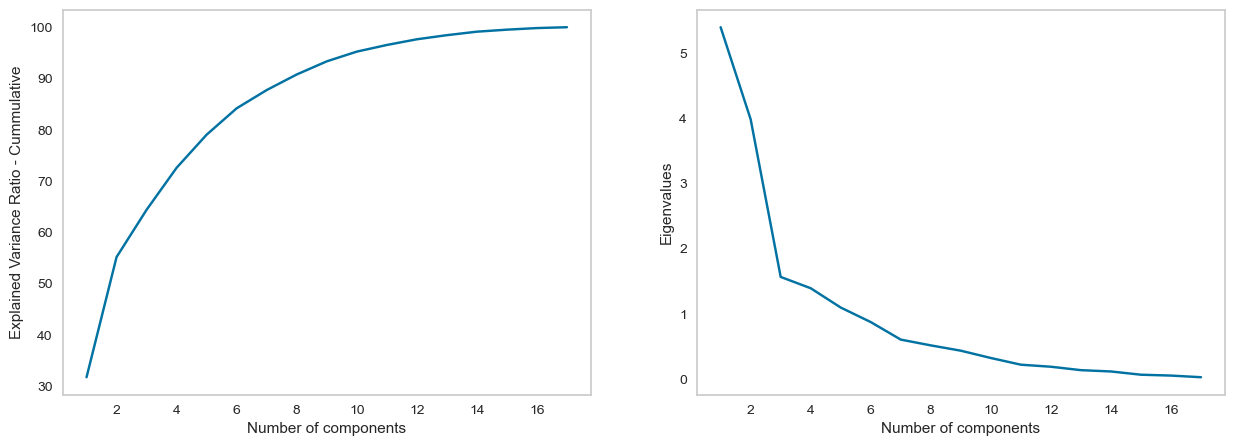

In [32]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')


In [33]:
# Let's train the model with 95 % of the original dataset information

pca = PCA(n_components=0.95)
pca.fit(scaled_data)

scaled_data = pca.transform(scaled_data)

## E.MODEL DEFINITION

In [34]:
kmeans = KMeans(init='k-means++')

Elbow Method


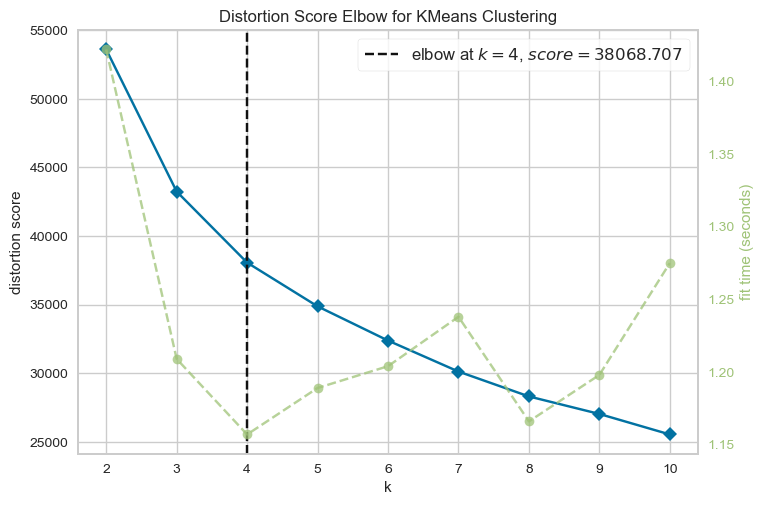

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
# elbow method
print('Elbow Method')
Elbow_M = KElbowVisualizer(kmeans, k=10)
Elbow_M.fit(scaled_data)
Elbow_M.show()

Based on the elbow method, the optimal value of `k` is at point `4`, meaning that `4 clusters` is the optimal number. I will then examine the silhouette score and plot for these clusters.

In [36]:
# Function to create Silhouette Plot

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.22951422227859583
For n_clusters = 3 The average silhouette_score is : 0.22820200417617767
For n_clusters = 4 The average silhouette_score is : 0.20766602532504083
For n_clusters = 5 The average silhouette_score is : 0.2027880275703545
For n_clusters = 6 The average silhouette_score is : 0.2050446298973889
For n_clusters = 7 The average silhouette_score is : 0.2168566411858029
For n_clusters = 8 The average silhouette_score is : 0.21940721248395786
For n_clusters = 9 The average silhouette_score is : 0.2097955315002881


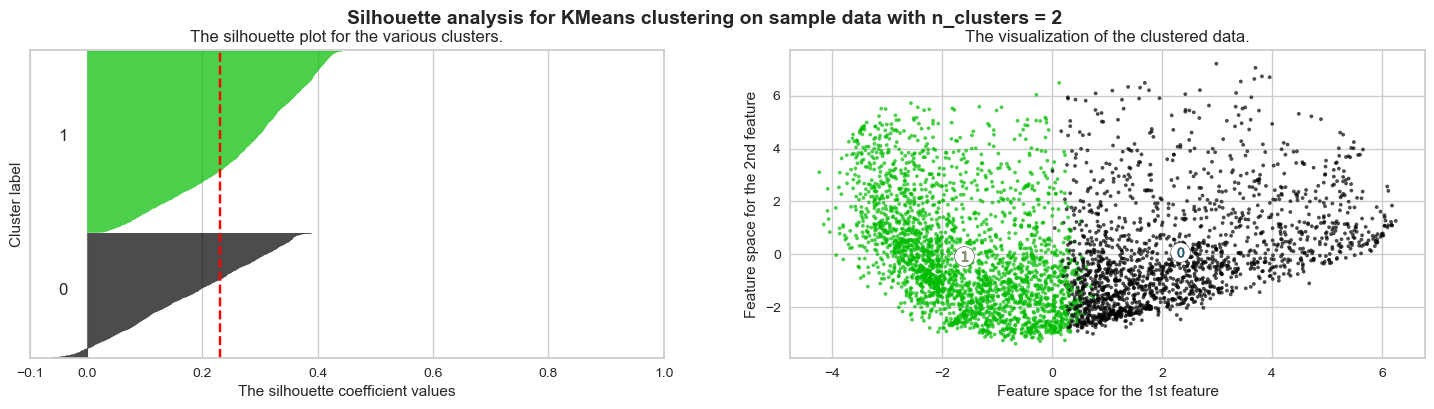

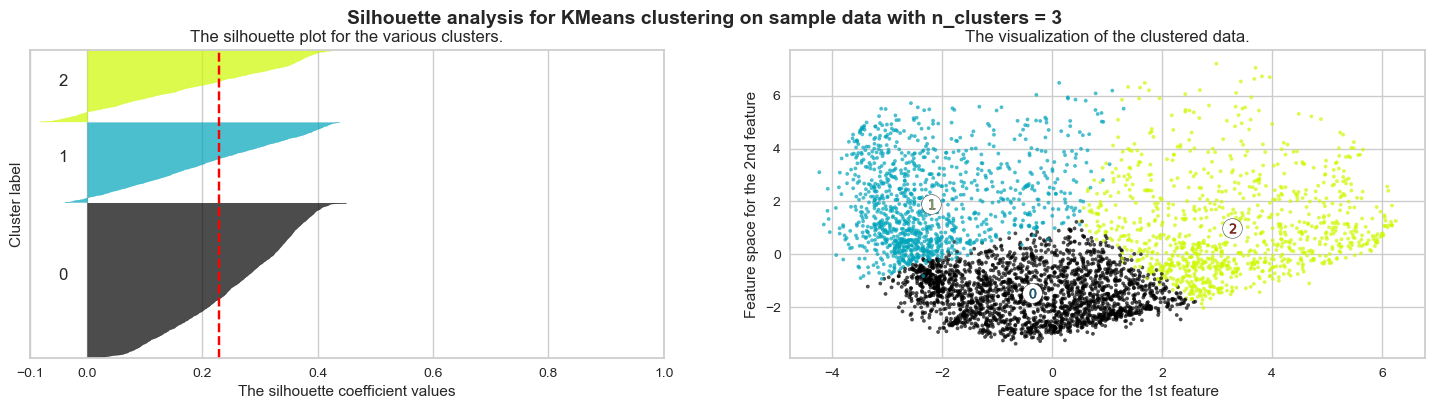

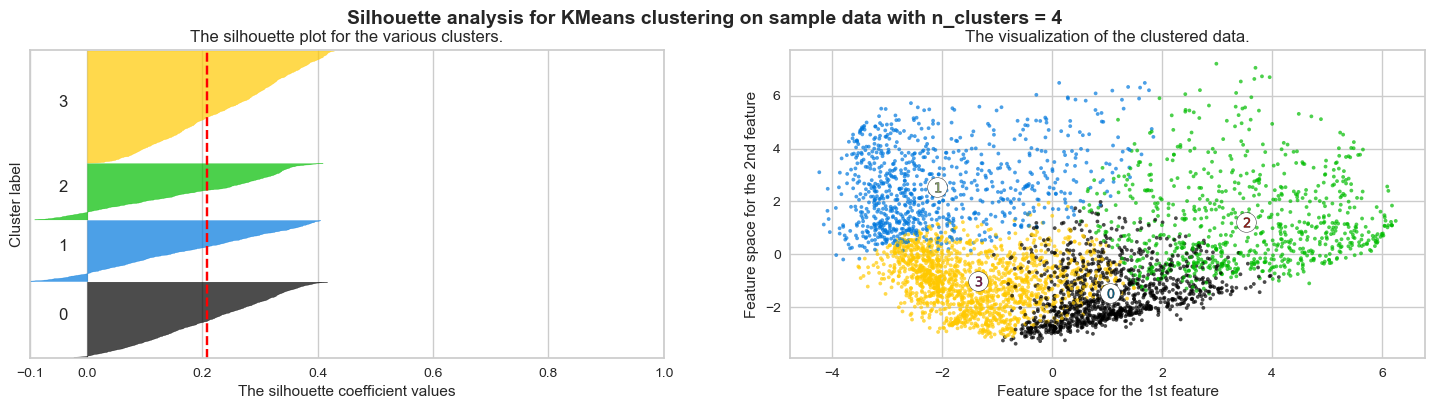

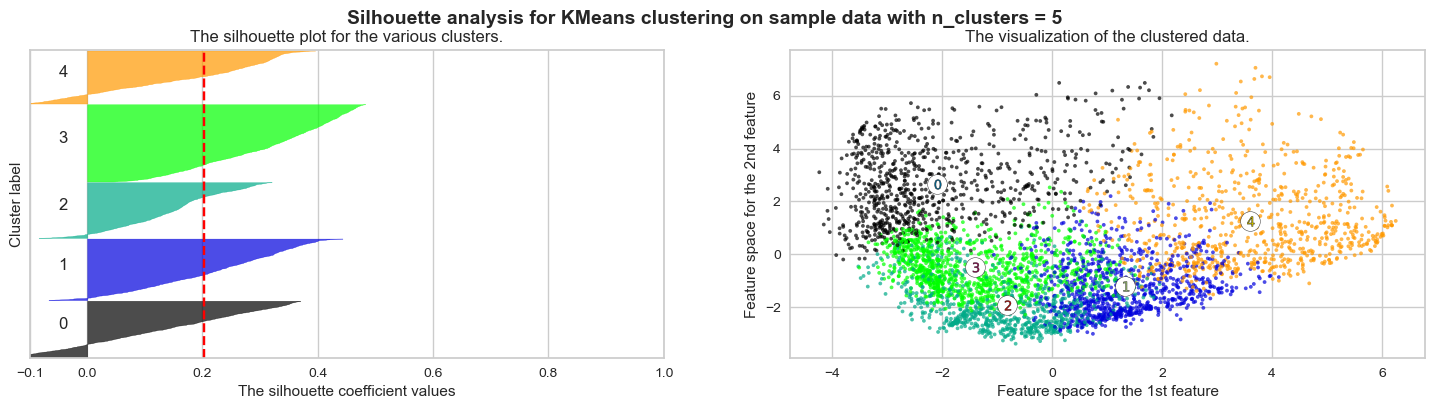

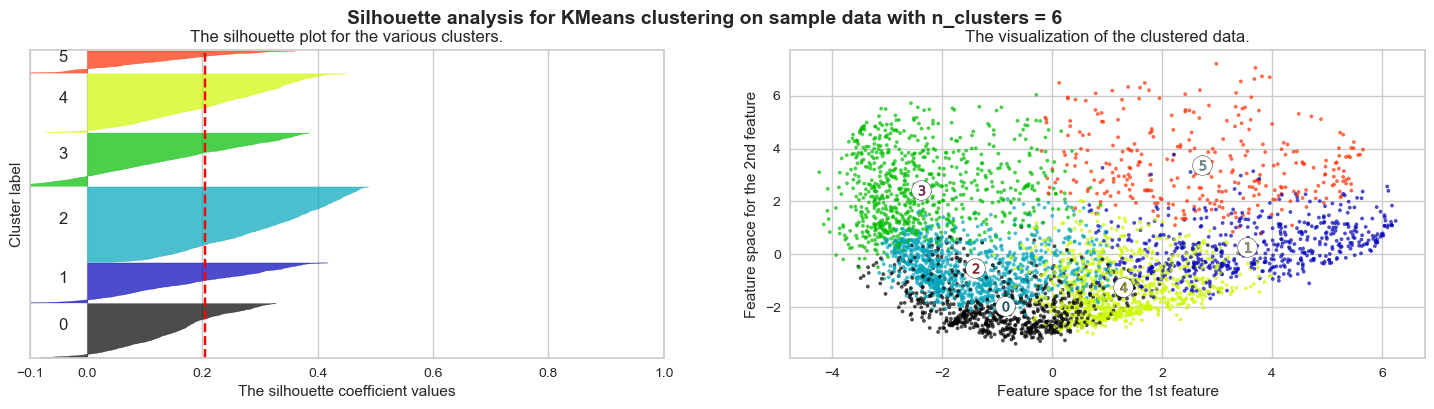

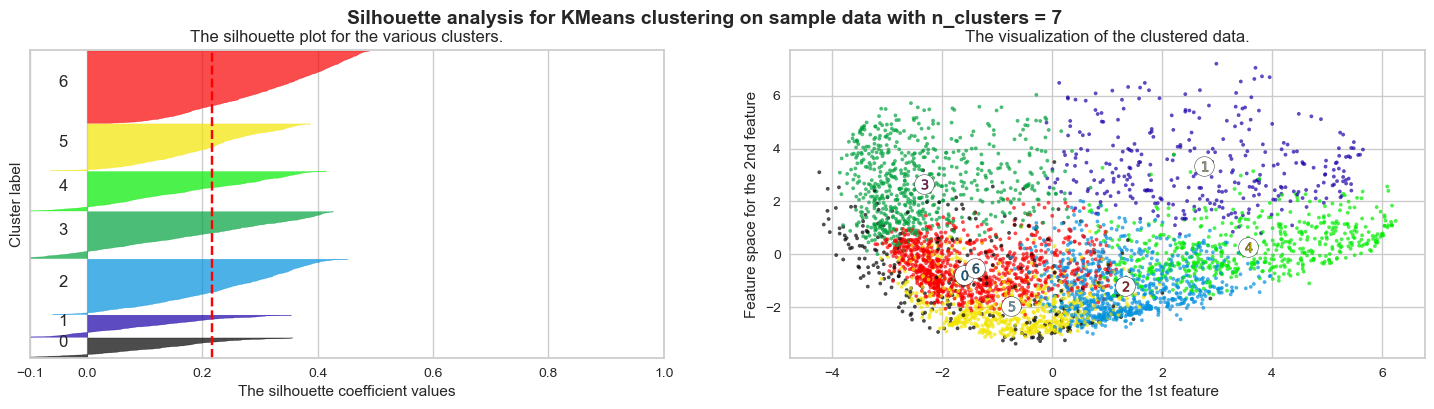

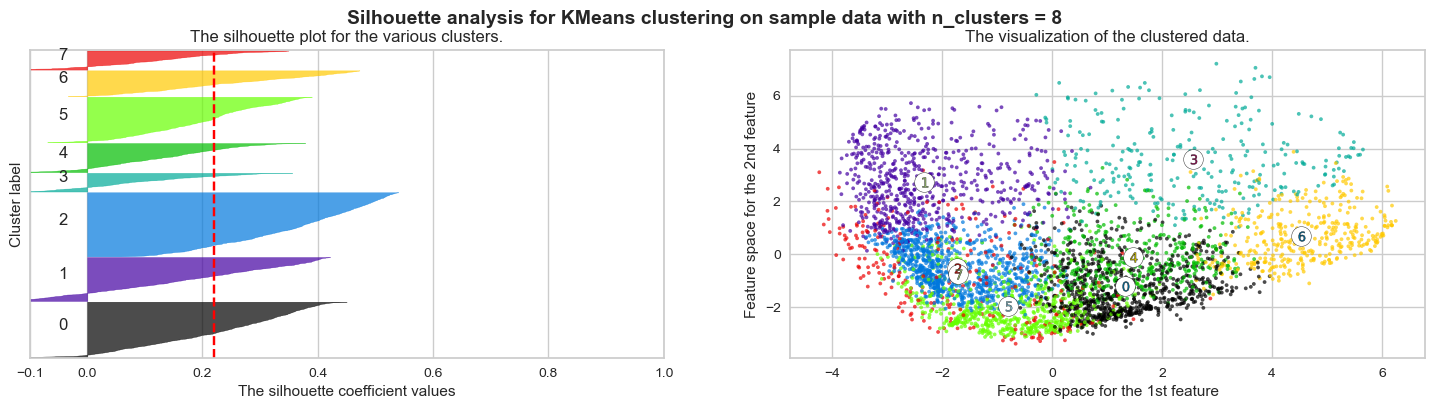

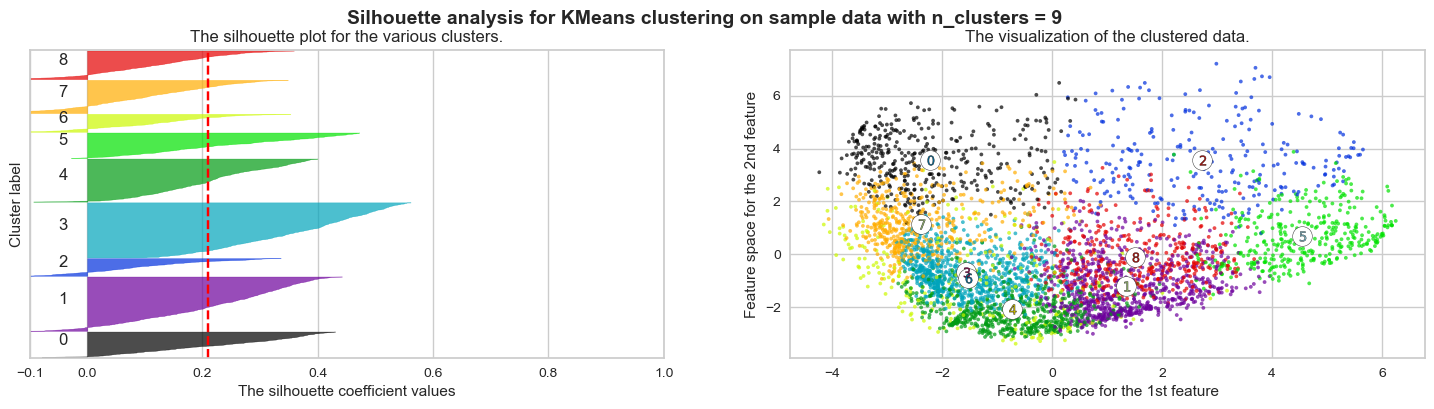

In [37]:
# Display the Silhouette Score and Plot Silhouette Plot
max_cluster1 = 10
plot_silhouette(range(2, max_cluster1), scaled_data, random_state=42)

Based on the silhouette score, it is noted that the values are almost the same, but the data distribution is not balanced. `k=4` has a fairly balanced silhouette score distribution. I have decided to use the value `k=4` or 4 clusters. Next, I will proceed with model training.

## F.MODEL TRAINING

### CLUSTERING

In [38]:
# Melakukan training model k-means menggunakan 4 cluster
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 4)
# Melakukan prediksi terhadap dataset menggunakan k-means
clusters = km.fit_predict(scaled_data)
clusters

array([1, 1, 1, ..., 2, 2, 2])

In [39]:
# Membuat kolom CLUSTER pada dataset original untuk menyimpan nilai prediksi
data['cluster'] = clusters
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8,1
1,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8,1
2,3976,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8,1
3,4266,2237.238086,1.000000,120.00,120.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2500.0,343.102984,712.986387,0.000000,8,1
4,4680,424.994385,0.375000,1200.00,1200.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,57.266292,56.720210,0.000000,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4310,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11,2
4311,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11,2
4312,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11,2
4313,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11,2


Setelah didapatkan nilai-nilai prediksi dari cluster, saya akan menyimpannya pada dataset original

## G.MODEL EDA

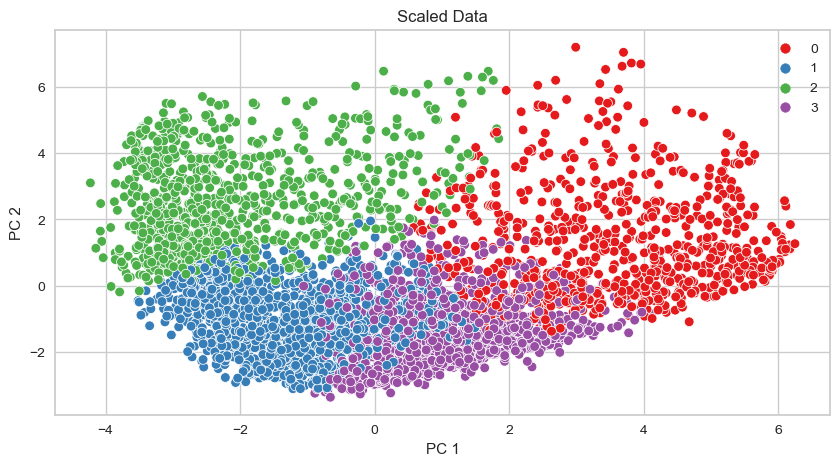

In [40]:
pca_2d_scaled=PCA(n_components=2, random_state=0).fit(scaled_data)
twod_scaled=pca_2d_scaled.transform(scaled_data)

fig, ax = plt.subplots(figsize=(10, 5))

sns.scatterplot(x=twod_scaled[:, 0], y=twod_scaled[:, 1], hue= clusters ,palette='Set1',ax=ax)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Scaled Data')
plt.show()

In [41]:
# Melakukan groupby berdasarkan cluster dan menghitung rata-rata
data_baru = data.groupby('cluster').mean().reset_index()

# Membulatkan nilai rata-rata menjadi satu desimal
data_baru = data.round(decimals=1)

# Tampilkan DataFrame yang sudah dibulatkan
data_baru

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,1902,943.6,0.9,103.0,103.0,0.0,0.0,0.1,0.1,0.0,0.0,0,1,1000.0,215.3,410.5,0.0,8,1
1,3426,461.5,1.0,585.0,585.0,0.0,0.0,0.1,0.1,0.0,0.0,0,1,1000.0,258.0,151.7,0.0,8,1
2,3976,1053.6,1.0,1450.0,1450.0,0.0,0.0,0.1,0.1,0.0,0.0,0,1,1500.0,397.1,227.1,0.0,8,1
3,4266,2237.2,1.0,120.0,120.0,0.0,0.0,0.1,0.1,0.0,0.0,0,1,2500.0,343.1,713.0,0.0,8,1
4,4680,425.0,0.4,1200.0,1200.0,0.0,0.0,0.1,0.1,0.0,0.0,0,1,1200.0,57.3,56.7,0.0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4310,4630,1079.0,1.0,0.0,0.0,0.0,1259.6,0.0,0.0,0.0,0.5,9,0,1200.0,1379.6,271.4,0.1,11,2
4311,8614,809.6,0.9,0.0,0.0,0.0,3819.7,0.0,0.0,0.0,0.5,7,0,4150.0,4372.1,241.6,0.1,11,2
4312,4296,3386.5,1.0,561.0,427.2,133.8,2008.2,1.0,0.7,0.4,0.5,9,20,10100.0,1039.0,886.1,0.0,11,2
4313,4476,4840.5,1.0,1595.9,1595.9,0.0,4359.3,0.5,0.5,0.0,0.5,17,25,6000.0,905.8,2376.9,0.1,11,2


### Cluster Interpretation:

Based on the average values obtained, I can draw the following conclusions for each cluster:

**Cluster 0:**
- High balance
- High purchase frequency
- High one-off purchases
- High installment purchases
- High credit limit

Cluster 0 indicates customers who have a high balance and frequently make purchases, including both one-off and installment purchases. They also have a high credit limit.

**Cluster 1:**
- Low balance
- Low purchase frequency
- Low one-off purchases
- Low installment purchases
- Low credit limit

Cluster 1 represents customers with low balances who make infrequent purchases, both one-off and installment, and have a low credit limit.

**Cluster 2:**
- High balance
- Low purchase frequency
- Low one-off purchases
- Normal installment purchases
- High credit limit

Cluster 2 consists of customers with high balances but lower purchase frequencies. They make fewer one-off purchases but maintain normal installment purchase habits. They also possess a high credit limit.

**Cluster 3:**
- Low balance
- Low purchase frequency
- Low one-off purchases
- High installment purchases
- Low credit limit

Cluster 3 includes customers with low balances who make infrequent purchases, especially one-off purchases. However, they have a higher tendency to make installment purchases despite having a low credit limit.

These interpretations provide insights into the different spending behaviors and financial profiles within each cluster, helping to tailor marketing strategies or financial products accordingly.

#### Visualisasi EDA After Clustering


### Balance vs purchase

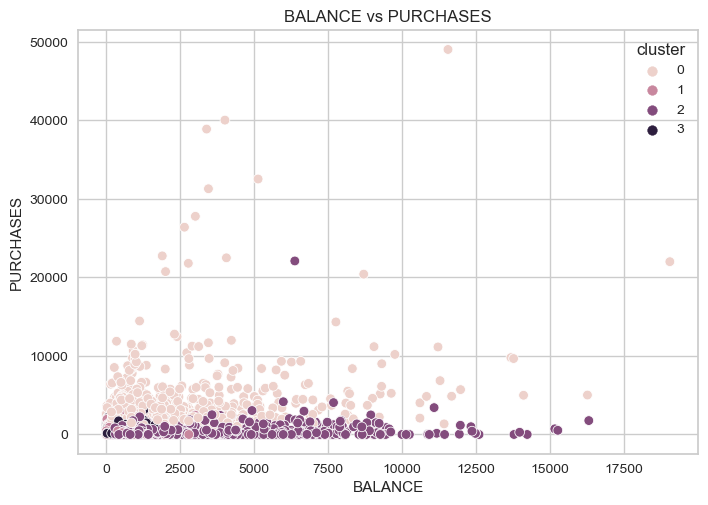

In [42]:
# Membuat scatter plot Life Expectancy vs Health
fig, ax = plt.subplots()
ax.set_title('BALANCE vs PURCHASES')
ax.set_xlabel('BALANCE')
ax.set_ylabel('PURCHASES')
sns.scatterplot(data=data, x='BALANCE',y='PURCHASES', hue='cluster', ax=ax)
plt.show()

From the data above, it can be concluded that the majority of the data belongs to cluster `0`, with purchase values below `10000`.

### Balance vs ONEOFF_PURCHASES

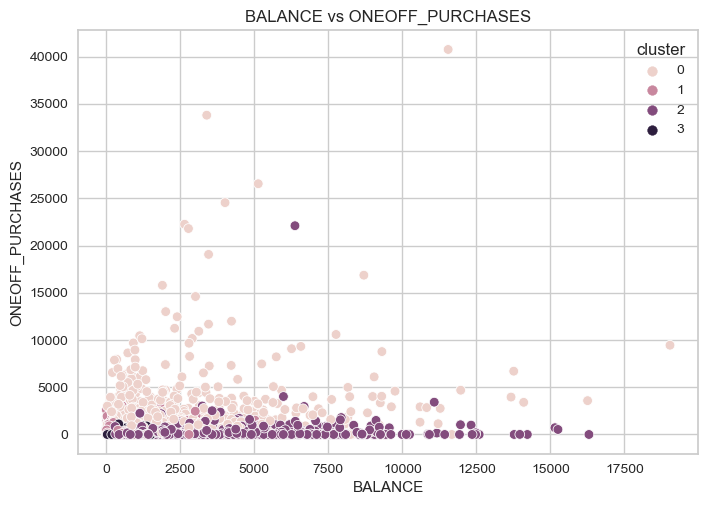

In [43]:
# Membuat scatter plot Life Expectancy vs Health
fig, ax = plt.subplots()
ax.set_title('BALANCE vs ONEOFF_PURCHASES')
ax.set_xlabel('BALANCE')
ax.set_ylabel('ONEOFF_PURCHASES')
sns.scatterplot(data=data, x='BALANCE',y='ONEOFF_PURCHASES', hue='cluster', ax=ax)
plt.show()

From the data above, we can conclude that on average, balances ranging from 0 to 5000 tend to make one-off purchases, with the majority falling into clusters 0 and 1.

### Balance vs INSTALLMENTS_PURCHASES

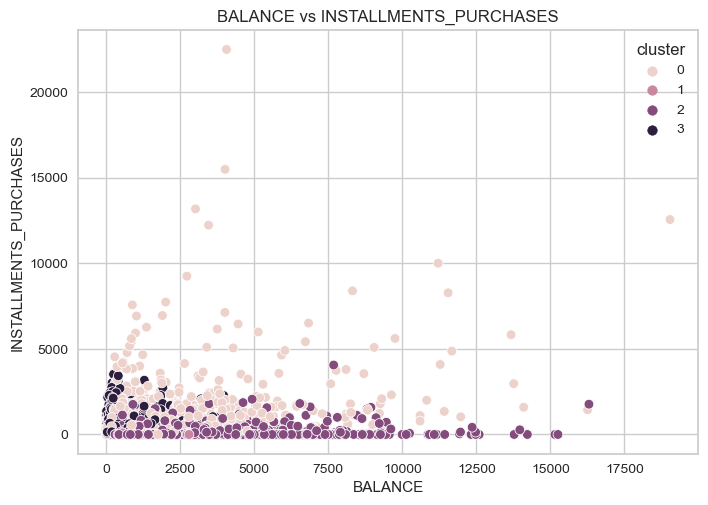

In [44]:
# Membuat scatter plot Life Expectancy vs Health
fig, ax = plt.subplots()
ax.set_title('BALANCE vs INSTALLMENTS_PURCHASES')
ax.set_xlabel('BALANCE')
ax.set_ylabel('INSTALLMENTS_PURCHASES')
sns.scatterplot(data=data, x='BALANCE',y='INSTALLMENTS_PURCHASES', hue='cluster', ax=ax)
plt.show()

From the data above, it can be seen that on average, cluster 2 predominates with more installment purchases.

### Balance vs CREDIT_LIMIT

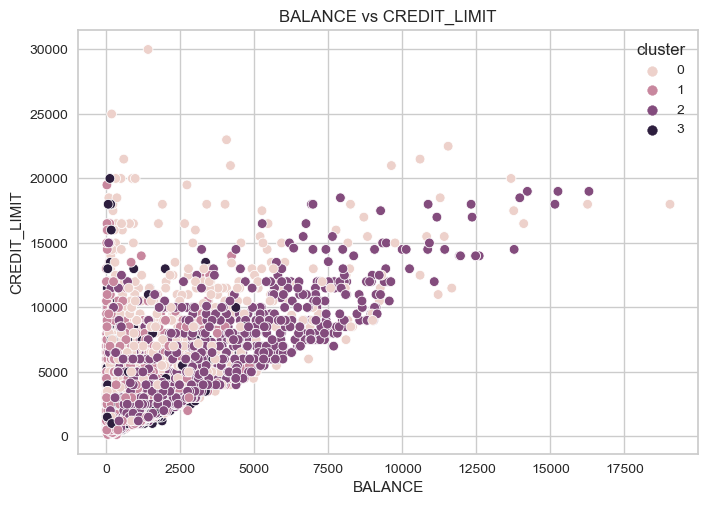

In [45]:
# Membuat scatter plot Life Expectancy vs Health
fig, ax = plt.subplots()
ax.set_title('BALANCE vs CREDIT_LIMIT')
ax.set_xlabel('BALANCE')
ax.set_ylabel('CREDIT_LIMIT')
sns.scatterplot(data=data, x='BALANCE',y='CREDIT_LIMIT', hue='cluster', ax=ax)
plt.show()

From the data above, it is evident that on average, balances ranging from 0 to 5000 have high credit limits falling within the range of 0 to 10000. Cluster 2 dominates this group of data.

### Balance vs CASH_ADVANCE

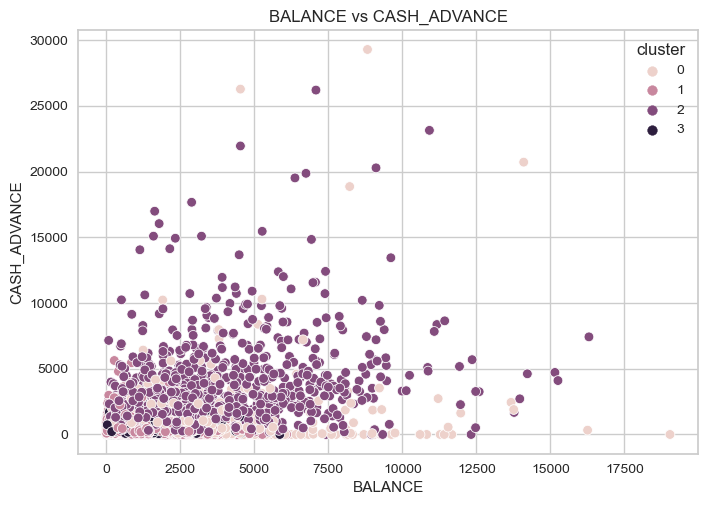

In [46]:
# Membuat scatter plot Life Expectancy vs Health
fig, ax = plt.subplots()
ax.set_title('BALANCE vs CASH_ADVANCE')
ax.set_xlabel('BALANCE')
ax.set_ylabel('CASH_ADVANCE')
sns.scatterplot(data=data_baru, x='BALANCE',y='CASH_ADVANCE', hue='cluster', ax=ax)
plt.show()

From the data above, we can conclude that cluster 2 tends to make more cash purchases compared to the other clusters.

### Total Cluster

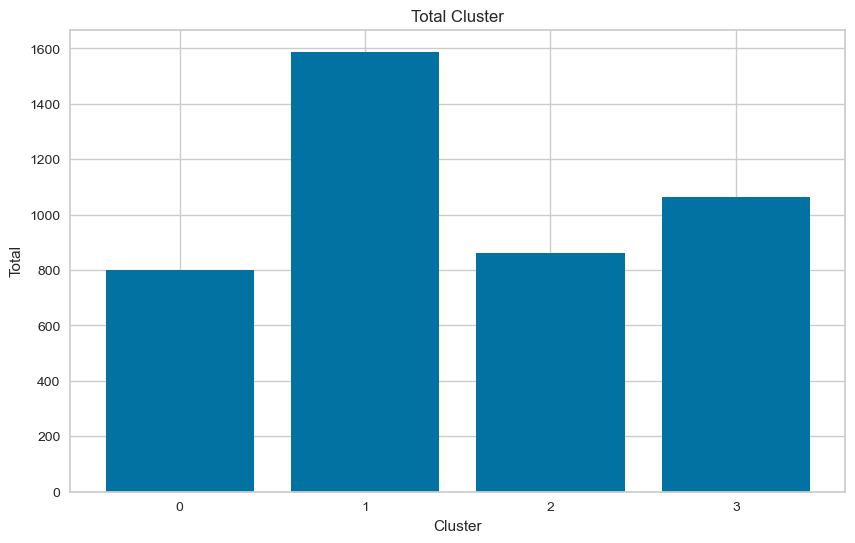

In [47]:
total_cluster = data_baru['cluster'].value_counts().reset_index()

# Mengganti nama kolom agar sesuai
total_cluster.columns = ['cluster', 'total']

# Membuat barplot
plt.figure(figsize=(10, 6))
plt.bar(total_cluster['cluster'], total_cluster['total'])
plt.title('Total Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total')
plt.xticks(total_cluster['cluster'])
plt.grid(True)
plt.show()

## H.MODEL SAVING

In [48]:
with open('model_scaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1)

with open('model_pca.pkl', 'wb') as file_2:
  pickle.dump(pca, file_2)

with open('model_km.pkl', 'wb') as file_3:
  pickle.dump(km, file_3)

## I.OVERALL ANALYSIS

In [49]:
data[data['cluster']==2].head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
229,8254,8115.039014,1.0,383.42,0.00,383.42,0.0,0.500000,0.000000,0.416667,0.0,0,7,11000.0,1982.542865,1821.785907,0.0,12,2
1165,1742,12323.845360,1.0,989.32,989.32,0.00,0.0,0.090909,0.090909,0.000000,0.0,0,2,18000.0,9542.247486,2540.084696,0.0,11,2
1421,3980,7418.314012,1.0,901.62,858.82,42.80,0.0,0.333333,0.166667,0.166667,0.0,0,4,14500.0,2273.945099,1696.786737,0.0,12,2
1452,6694,8953.743398,1.0,254.85,83.97,170.88,0.0,0.333333,0.083333,0.250000,0.0,0,5,12000.0,2105.588422,3520.422846,0.0,12,2
1750,3052,9335.314170,1.0,226.23,226.23,0.00,0.0,0.166667,0.166667,0.000000,0.0,0,5,15000.0,1885.239981,4980.192685,0.0,12,2


Based on the characteristics obtained from the model evaluation, it can be observed that cluster 2 exhibits better characteristics compared to the other clusters. This is due to its high balance, infrequent installment purchases, and high credit limit.

### Recommendation

The model successfully performed clustering on the numeric dataset. However, due to the challenge of determining cluster characteristics solely from numerical data, it would be beneficial to consider datasets that include clear categorical data. This can lead to better-defined cluster characteristics and more insightful analyses.

## Conceptual Problem

1. **Inertia in K-means Algorithm**

Inertia in k-means refers to how optimal the clusters generated are. Its goal is to minimize inertia, which means trying to group data into clusters where the center is close to the data points within them.

2. **Elbow Method**

The Elbow Method is a technique used to determine the optimal number of clusters.

Reasons for Using the Elbow Method:
- It is simple and easy to understand.
- Provides a clear visualization.
- Efficient in practice.

3. **How to Use the Elbow Method**

The Elbow Method involves:
- Computing the inertia for each value of \( K \).
- Plotting the inertia values for different numbers of clusters.
- Identifying the "elbow point" on the inertia plot.

Advantages:
- Simple and easy to understand.
- Provides a visual indication of the optimal number of clusters.
- Quick to perform and suitable for relatively small to medium-sized datasets.

Disadvantages:
- It's not always easy to identify a clear "elbow" point on the inertia plot.
- Subjective interpretation of the plot; the "elbow" point can be ambiguous.
- May not always yield the optimal number of clusters, especially for complex or unstructured data.